
[Link to Github repository](https://github.com/IsabellaSegarra/eds220-hwk4)

### Background:
In January 2025, the Eaton and Palisades fires erupted in the foothills of Los Angeles county, devasting the region and displacing thousands. In total, these fires burned more than 37,000 acres and destroyed more than 16,000 structures(@FrontlineWildfire2025Impact).

 In this project, I integrated data from Landsat Collection 2 Level-2 atmospherically corrected surface reflactance data with fire perimeters. This data is used to visualize the burn scars left from the Eaton and Palisades fire and is utilized with the fire perimeter data. Additionally, to see the community impact of the fires, I mapped the fire perimeters with U.S. census data. 

### The data I used: 
#### Fire Perimeter Data 
[Fire permimeter data](https://hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about) is from the county of Los Angeles via ArcGIS.  

#### Landsat 8 Data
Landsat data ([What is Landsat 8?](https://science.nasa.gov/mission/landsat-8/)
)is a dataset from the [Microsoft Planetary Computer](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2). This data has already been clipped to the area of the fire perimeters.

#### EJI Data
Census data is from the [Environmental Justice Index](https://www.atsdr.cdc.gov/place-health/php/eji/eji-data-download.html). The Environmental Justice Index (EJI) is a national tool that measures the cumulative health impacts of environmental burdens across communities. It is a useful tool to map places most vulnerable to environmental and health inequities. This is a geodatabase from the CDC/ATSDR ranks U.S. census tracts. 

### Analysis highlights: What will I do? 
- Wrangle `netCdf4` data ([view documentation here](https://unidata.github.io/netcdf4-python/)):
    - Landsat 8 data is read in as a netCdf4 dataset. This data requires special data wrangling in order to use, such as restoring geospatial information in order to access the coordinate reference system. 
    - Landsat 8 data contains 11 spectral bands that can be utilized in intentional combinations to visualize maps in true color, false color, etc. 
-  Visualize burn scars using false color imagery.
    - When utilizing spectral bands in certain combinations(selecting short-wave infrared, near-infrared, and red bands), features on a landscape can be visualized. 
- Visualize social impacts of the LA fires.
    - EJI data is aggregated based on census tracts. When applied to the fire perimeters, a story can be told about the social impacts of the LA fires. In this analysis, I mapped the percentile rank of individuals over 65+ to view the impacts on our elderly community. 





 ### Import libraries

In [1]:
# Environment set-up 
import pandas as pd # For data wrangling
import numpy as np  # For data wrangling 
import geopandas as gpd # For geospatial data 
import os # For data import
import matplotlib.pyplot as plt  # For visualizations 
import xarray as xr # For Netcdf4 data 
import rioxarray as rio # For xarray data 

### Data Import
I will import the fire perimeter, Landsat, and EJI data. 
- Use `os` package to import fire perimeter shapefiles 
- Use 'xarray` package to import Landsat data
- Use `os` package to import EJI geodatabase

In [2]:
# Import fire perimeter data
# Eaton fire >>>
fp_eaton = os.path.join('data', 'Eaton_Perimeter_20250121') # use 'os' to specify file path 
eaton_perim = gpd.read_file(fp_eaton) # use 'gpd' to read in geospatial data with geopandas 
# Palisades fire >>>
fp_palisades = os.path.join('data','Palisades_Perimeter_20250121') # use 'os' to specify file path 
palisades_perim = gpd.read_file(fp_palisades) # use 'gpd' to read in geospatial data with geopandas

In [30]:
# Import Landsat data 
landsat_fp = os.path.join('data', 'landsat8-2025-02-23-palisades-eaton.nc')
landsat = xr.open_dataset(landsat_fp)

In [4]:
# Import EJI data 
# Define file path
fp_eji = os.path.join('data', 'EJI_2024_California', 'EJI_2024_California.gdb')
eji_ca = gpd.read_file(fp_eji) 

### Fire perimeter data exploration 
In this section I will do some preliminary exploration of the fire data. Since this is geospatial data, I will do the following:
- check the *CRS* of each dataset 
- check if the data is projected 
- check if the data is multipolygon or polygon 


In [31]:
# Eaton fire perimeter
print('CRS:', eaton_perim.crs) 
print('Is geographic?:', eaton_perim.crs.is_geographic)
print('Is projected?:', eaton_perim.crs.is_projected)
print('Is geometry polygon?:', (eaton_perim.geom_type == 'Polygon').all())

CRS: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]
Is geographic?: False
Is projected?: True
Is geometry polygon?: True


In [32]:
# Palisades fire perimeter
print('CRS:', palisades_perim.crs)
print('Is geographic?:', palisades_perim.crs.is_geographic)
print('Is projected?:', palisades_perim.crs.is_projected)
print('Is geometry polygon?:', (palisades_perim.geom_type == 'Polygon').all())

CRS: PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]
Is geographic?: False
Is projected?: True
Is geometry polygon?: True


Although both datasets come from the same origin, it is best practice to check that their CRS's match. This `assert` function will rase a *warning* if the CRS of Eaton and Palisades fire do not match. 

In [33]:
# Assert that the CRSs match 
assert eaton_perim.crs == palisades_perim.crs

**Exploration Findings**

From my preliminary exploration, I see that both datasets have matching coordinate refrence systems, are both projected, and all have polygon geometries. 

### Landsat data exploration 
In this section I will do some preliminary exploration of the landsat data. I will do the following:
- view the attributes, dimensions, and variables of the data
- check the CRS of the data


In [8]:
# View the variables, attributes, and dimensions of the data
landsat

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

In [9]:
# Print the landsat CRS 
print(landsat.rio.crs)

None


**Exploration findings**

The Landsat data contains coordinates (x,y) with time (z). The variables correspond to wavelengths red, green, blue, near infared (nir), short wave infared(swir22), and a spatial refrence variable with information relating to the cooordinate refrence system and datum. The CRS of the dataset is not directly accessibly through `rio.crs`. Through accessing the 'spatial_ref' variable, I learned that the CRS for this dataset is 32611, which does not match the Eaton and Palisades fire perimeters' CRS. 

## Restoring geospatial information
Since the CRS of the Landsat data is stored the 'spatial_ref' variable, in order to proceed with mapping the data, I need to restore the geospatial information. By storing the geospatial informaiton in a variable, this reduces the size and processing time of the Landsat data.

In [34]:
# View the landsat crs by accessing it through the spatial_ref attribute. Store this variable.
landsat_crs = landsat.spatial_ref.crs_wkt
landsat_crs

'PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'

Now I will use `rio.write_crs()` to recover the geospatial information from the stored `landsat_crs` variable.

In [11]:
# Recover geospatial information 
landsat = landsat.rio.write_crs(landsat_crs, inplace=True) # recover the CRS from the spatial_ref  

# Confirm CRS 
print(landsat.rio.crs)

EPSG:32611


## Mapping Landsat: True Color 
Now I will plot the Landsat data with true colors or colors within the light spectrum that we can see (i.e., red, green, and blue). When these three bands are used in combination, a full-color image emerges. 

In order to map the Landsat data with true colors, I need to access the red, green, and blue bands. 

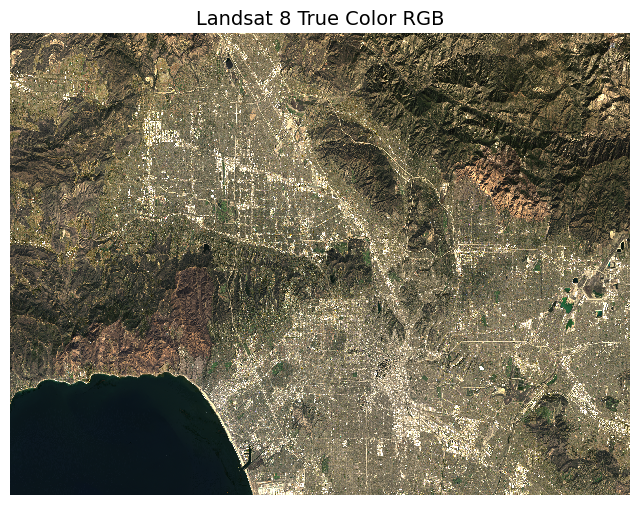

In [35]:
# True color map 
fig, ax = plt.subplots(figsize=(8, 6)) # Create figure plot 
ax.axis('off') # Remove axes 
landsat[['red', 'green', 'blue']].to_array().fillna(0).plot.imshow( # Add true colors data
        vmin= 7000, vmax=15200,  # Adjust the darkness (vmin) and brightness (vmax) levels
        robust = True, # Get rid of outliers 
        ax=ax,
    )

ax.set_title("Landsat 8 True Color RGB", fontsize=14)
plt.show()

## Mapping Landsat: False color image
Now I will plot the Landsat data with false colors. False-color imagery combines wavelengths not visible to the human eye with visible wavelengths to reveal details that would otherwise go unnoticed (@NASA2014FalseColor). This is a useful method for visualizing the impacts of fire on the land. For this map, I used *short-wave infared*, *near-infared*, and *red* bands to depict vegetation and burn scars on a map. 

### CRS Matching 

Before adding the Eaton and Palisades fire perimeters to do the map, I need to transform the CRS of Eaton and Palisades to match the landsat data. This ensures that the fire perimeters are correctly placed *spatially* on the landsat map.

In [ ]:
# Transform fire perimeters to match the CRS of landsat 
eaton_perim = eaton_perim.to_crs(landsat.rio.crs)
palisades_perim = palisades_perim.to_crs(landsat.rio.crs)

# Assert that the CRS of Eaton matches the CRS of Palisades
assert eaton_perim.crs == palisades_perim.crs 
# Assert that the CRS of Palisades matches the CRS of landsat 
assert landsat.rio.crs == palisades_perim.crs 

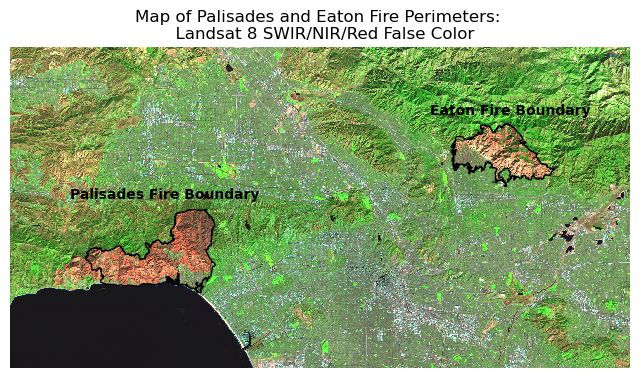

In [36]:
fig, ax = plt.subplots(figsize=(8, 6)) # create figure plot 
ax.axis('off') # remove axes 

landsat[['swir22', 'nir08', 'red']].to_array().fillna(0).plot.imshow( # add landsat data
    vmin= 6000, vmax=19000, # adjust the darkness (vmin) and brightness (vmax) levels
    robust = True,
    ax=ax,
)
eaton_perim.plot(ax=ax, color = 'none', edgecolor = 'black', label = 'Eaton fire perimeter')
palisades_perim.plot(ax=ax, color = 'none', edgecolor = 'black', label = 'Palisades fire perimeter')

plt.figtext(x = .65,
            y = .65,
            s ="Eaton Fire Boundary",
            weight = 'bold')
plt.figtext(x = .2,
            y = .51,
            s ="Palisades Fire Boundary",
            weight = 'bold')
ax.set_title("Map of Palisades and Eaton Fire Perimeters: \n  Landsat 8 SWIR/NIR/Red False Color", fontsize=12)
plt.savefig('fire_map.png', dpi=300, transparent=True)


The map above is a false color map depicting the Palisades and Eaton fire boundaries. The map utilizes false color imagery, or a method for displaying wavelengths beyond the human eye's ability to see. Near infared (NIR) shows healhty vegetation and short-wave infared (SWIR) show recently burned regions.  Through this process of utilizing the near infared, short-wave infared, and red bands, we are able to see the lack of vegetation present within the Palisades and Eaton fire boundaries. 


## Visualizing Fires with Socieconomic Data 
In this section I will perform a social dimensions analysis with the EJI data to view the impact of the Palisades and Eaton fires on individuals 65+. 

In this section, I will perform the following: 
1. Clip EJI data to match fire perimeters. 
3. Map EJI data to fire perimeters. 

### Polygon clipping
In order to fit the census tracts within the fire perimeters, I will perform *polygon clipping* with `gpd.clip()`. Clipping removes all features that fall outside a specified boundary, effectively trimming one dataset with another. 

In [ ]:
# Change the CRS EJI to match palisades 
eji_ca = eji_ca.to_crs(palisades_perim.crs)
# Clip eji to palisades
palisades_clip = gpd.clip(eji_ca, palisades_perim)
# Clip eji to eaton
eaton_clip = gpd.clip(eji_ca, eaton_perim)

In [ ]:
assert eji_ca.crs == palisades_perim.crs
assert eji.crs == eaton_fire.crs

### Mapping Impact of Fires on 65+ Community
In this section I will map the EJI variable `E_AGE65` (Percentile rank of the percentage of persons aged 65 and older) to the fire perimeters. 

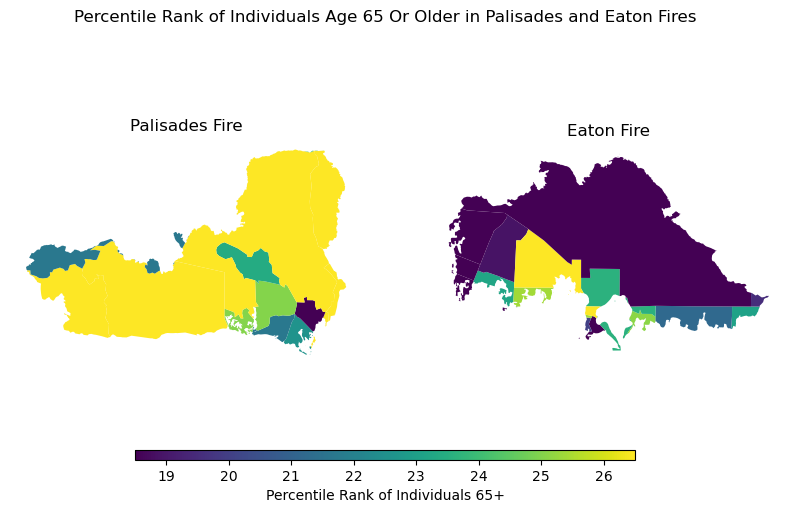

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Define EJI variable
eji_variable = 'E_AGE65'

# Find common min/max for legend range
vmin = min(palisades_clip[eji_variable].min(), palisades_clip[eji_variable].min())
vmax = max(eaton_clip[eji_variable].max(), eaton_clip[eji_variable].max())

# Plot census tracts within Palisades perimeter
palisades_clip.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('Palisades Fire')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eaton_clip.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Eaton Fire')
ax2.axis('off')

# Add overall title
fig.suptitle('Percentile Rank of Individuals Age 65 Or Older in Palisades and Eaton Fires')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Percentile Rank of Individuals 65+')

plt.show()

The map above shows the concentration of individuals aged 65 and older affected by the Palisades and Eaton fires. Certain areas within the fire perimeters have noticeably higher proportions of older adults. According to CBS News, approximately 21% of residents in the Eaton Fire zone and 26% of residents in the Palisades Fire zone were over the age of 65. This analysis resonates with me after watching numerous videos shared by local residents during the fires—stories of older adults losing homes filled with decades of memories were especially heartbreaking.


## References

Los Angeles County/ NIFC FIRIS. (2025). Palisades_and_Eaton_Dissolved_Fire_Perimeters [data file] Available: https://hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about [Date of Access: November 17 2025]

 U.S. Geological Survey. Landsat Collection 2 Level-2 Surface Reflectance (Microsoft Planetary Computer version)_[data file] Available: https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2#overview [Date of Access: November 17 2025]

 Centers for Disease Control and Prevention and Agency for Toxic Substances Disease Registry. [Year] Environmental Justice Index. [Date of Access: November 21 2025]. https://atsdr.cdc.gov/place-health/php/eji/eji-data-download.html

 Riebeek, H. (2014, March 4). Why is that forest red and that cloud blue? NASA Earth Observatory. https://earthobservatory.nasa.gov/features/FalseColor 

 CBS News. (2025, March 18). Older L.A. wildfire victims struggle to pick up the pieces. CBS News. https://www.cbsnews.com/news/elderly-los-angeles-wildfire-victims/

 